# Adult Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"D:\DATA\adult.csv")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

###### Renameing the columns

In [5]:
columns_data = ['age','workclass','fnlwggt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hr_per_work','native_cunt','dominicain_republic']

In [6]:
df.columns = columns_data

In [7]:
df.head()

,age,workclass,fnlwggt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_work,native_cunt,dominicain_republic
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


   age: continuous.
   
   workclass:  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
   fnlwgt: continuous.
   
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,                10th, Doctorate, 5th-6th, Preschool.
    
    education-num: continuous.
    
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-   op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    
    sex: Female, Male.
    
    capital-gain: continuous.
    
    capital-loss: continuous.
    
    hours-per-week: continuous.
    
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand- Netherlands.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  32560 non-null  int64 
 1   workclass            32560 non-null  object
 2   fnlwggt              32560 non-null  int64 
 3   education            32560 non-null  object
 4   education_num        32560 non-null  int64 
 5   marital_status       32560 non-null  object
 6   occupation           32560 non-null  object
 7   relationship         32560 non-null  object
 8   race                 32560 non-null  object
 9   sex                  32560 non-null  object
 10  capital_gain         32560 non-null  int64 
 11  capital_loss         32560 non-null  int64 
 12  hr_per_work          32560 non-null  int64 
 13  native_cunt          32560 non-null  object
 14  dominicain_republic  32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have total 15 columns dtype as int64 and object

In [9]:
df.describe()

,age,fnlwggt,education_num,capital_gain,capital_loss,hr_per_work
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


                             age                                           
        minimum age is 17 and maximum age is 90        
        50 percentile of age is less than or equal to 37.
        mean age is 39
    
                           hr_per_work

    50 percentile of people with age <= 37 have being work for less than equal to 40 hours per week

In [10]:
import seaborn as sns

In [11]:
df['dominicain_republic'].value_counts()

 <=50K    24719
 >50K      7841
Name: dominicain_republic, dtype: int64

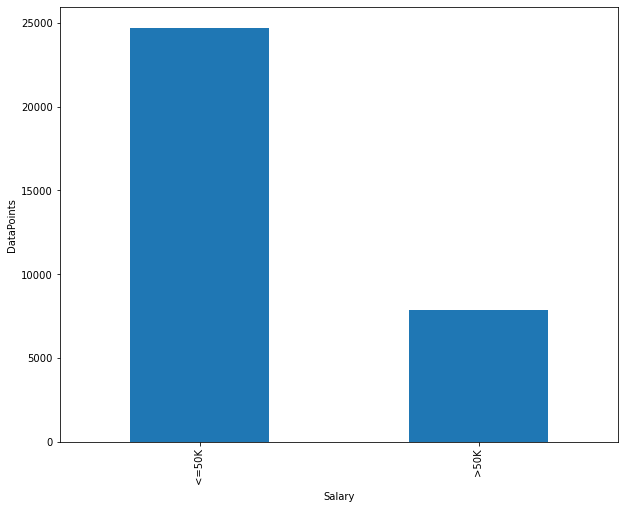

In [12]:
plt.figure(figsize=(10,8))
df['dominicain_republic'].value_counts().plot.bar()
plt.xlabel("Salary")
plt.ylabel("DataPoints")
plt.show()

24719 people having salary less than equal to 50K

7841 people having salary more than equal to 50K

#### Lets separate the Features and Labels

X=Features & y=Labels

In [13]:
X,y = df.iloc[:,:-1], df.iloc[:,-1]

In [14]:
cat_cols = [col for col in X.columns if X[col].dtype in ['object']]
#cat_cols have categorical values

In [15]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_cunt']

In [16]:
num_cols = [col for col in X.columns if col not in cat_cols]
#num_cols have numarical values

In [17]:
num_cols

['age',
 'fnlwggt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hr_per_work']

In [18]:
df_num = df[num_cols]

In [19]:
df_cat = df[cat_cols]

In [20]:
df_num

,age,fnlwggt,education_num,capital_gain,capital_loss,hr_per_work
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [21]:
df_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_cunt
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


##### Importing OneHotEncoding 
###### it will convert object dtype into integer dtype

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder = OneHotEncoder()

In [24]:
sample = df_cat.head(1000).copy()

In [25]:
sample

,workclass,education,marital_status,occupation,relationship,race,sex,native_cunt
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
995,Private,Masters,Divorced,Prof-specialty,Not-in-family,White,Male,United-States
996,Federal-gov,Bachelors,Divorced,Exec-managerial,Unmarried,White,Male,United-States
997,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
998,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [26]:
cat_sample = sample[cat_cols]

In [27]:
cat_sample

,workclass,education,marital_status,occupation,relationship,race,sex,native_cunt
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
995,Private,Masters,Divorced,Prof-specialty,Not-in-family,White,Male,United-States
996,Federal-gov,Bachelors,Divorced,Exec-managerial,Unmarried,White,Male,United-States
997,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
998,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [28]:
df_cat_ohe = encoder.fit_transform(cat_sample.values)

In [29]:
df_cat_ohe.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
encoder.categories_

[array([' ?', ' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
        ' Self-emp-not-inc', ' State-gov'], dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array([' Ame

In [31]:
edf=pd.DataFrame(df_cat_ohe.toarray())

In [32]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [33]:
cols = df_num.columns
final_num = num_pipeline.fit_transform(df_num[cols].values)

In [34]:
final_num

array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [-1.21562378,  0.11092744, -0.42002663, -0.14591373, -0.21666301,
        -1.65520046],
       [ 0.98372   ,  0.92986178, -0.42002663,  1.88840054, -0.21666301,
        -0.03542999]])

In [35]:
final_num.shape

(32560, 6)

In [36]:
df_num.shape

(32560, 6)

In [37]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, cols),
        ("cat", OneHotEncoder(), cat_cols),
    ])

In [38]:
final_data_repared = full_pipeline.fit_transform(df)

In [39]:
final_data_repared.toarray().shape

(32560, 108)

In [40]:
pd.DataFrame(final_data_repared.toarray())

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.837097,-1.008742,1.134779,-0.145914,-0.216663,-2.222120,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.042640,0.245046,-0.420027,-0.145914,-0.216663,-0.035430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.057031,0.425770,-1.197429,-0.145914,-0.216663,-0.035430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.775755,1.408146,1.134779,-0.145914,-0.216663,-0.035430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.115952,0.898170,1.523480,-0.145914,-0.216663,-0.035430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.639710,0.746077,-0.145914,-0.216663,-0.197407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32556,0.103982,-0.335466,-0.420027,-0.145914,-0.216663,-0.035430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,1.423589,-0.358811,-0.420027,-0.145914,-0.216663,-0.035430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,-1.215624,0.110927,-0.420027,-0.145914,-0.216663,-1.655200,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Splitting the data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(final_data_repared, y, test_size=0.2, random_state=123)

In [42]:
knn = KNeighborsClassifier()

In [43]:
X_train.shape

(26048, 108)

In [44]:
X_test.shape

(6512, 108)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
%%time
knn.score(X_train,y_train)

Wall time: 27.9 s


0.8821790540540541

In [47]:
%%time
knn.score(X_test,y_test)

Wall time: 6.48 s


0.8376842751842751